#  1 - Bagging & Boosting

This first notebook of the subject consists in reusing a known dataset (NBA dataset used in 7th delivery of MD004) in order to apply the new techniques and methods lectured on monday/tuesday classes instead the logaritmic regression used there.

This time, the notebook contains 6 different sections to achieve the results, summarized below:

- Section 1 - Feature selection: Aligned with all Data Science processes, a first analysis of the dataset, understand the domain and select those attributes worthy for use. 
- Section 2 - Model Study 1: In this section a model based on a weak learner is required, improved afterwards with *bagging* technique.
- Section 3 - Model Study 2: Random Forest application with the corresponding analysis.
- Section 4 - Model Study 3: Gradiend Boosted Trees application, analysis and explanation on the design.
- Section 5 - Model Selection: Generate different confusion matrices for the models and analyze. 
- Section 6 - Model Explanation: Shap Values application for understand boosted trees.

- Extra section - Model Stacking: Apply the stacking principle to generate robust models.

## Dataset - NBA 
The dataset contains several information about rookie players aiming to get some insights about those players and try to predict with the actual data the future career of new incoming players.

Contains the data of 1340 players characterized with 20 attributes + the objective attribute (which is binary based in passing or not the 5 year career).

As happened in MD004, some analysis is needed since some elements are repeated (probably due to wrong data input) or maybe because for some players they have collected data different times during the years. 

### Section 1 - Feature selection & Data exploration
Despite this sections has been done previously and an option would be just extract the final data, it's a good practice to develop it in this environment since it's a different language (R -> Python).

Moreover, once the attributes are selected through 'typical methods' will be compared with *feature importance* from *decision tree* and *random forest* (both since will be the first two algorithms used and the advanced algorithms use it on base).

Finally, results will be compared against typical methods for attribute selection to check it out if results are similar to this *feature importance*, selecting the best ones.

In [1]:
# Basic libraries

import os
import pandas as pd
import numpy as np

# More libraries
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn import preprocessing 
import lightgbm as lgb
import xgboost as xgb
from mlxtend.plotting import plot_learning_curves

from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Models for boosting
import xgboost as xgb
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

# Folder containing all datasets for MD008 subject
datasets_path = "/Users/sergi/Desktop/Uni/MD008-Sistemas_conocimiento_2/exercises-logistic-regression-exercise-1/"

# NBA dataset name + filetype
dataset_name = "nba_logreg.csv"


# Loading the dataset
raw_NBA = pd.read_csv(datasets_path+dataset_name
                         , header = 0
                         , decimal = ".")
# Dataset head
raw_NBA.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [2]:
# Dataset shape
print("dataset size:", raw_NBA.shape)

dataset size: (1340, 21)


In [3]:
# Statistical summary
raw_NBA.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


#### Null values procedure
Having a look into *describe()* there's a column with fewer values than the rest (**3P\%**) meaning there's some *null* values in the dataset. In order to proceed, it's necessary to deal with *null* values since most algorithms cannot deal with them. 

In [4]:
# Check the amount of Null elements
nulls = raw_NBA.isnull().sum().sum()

# Store the rows and visualize a statistical description
if nulls >0:
    null_rows = raw_NBA[raw_NBA.isnull().any(axis=1)]
null_rows.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.0,0.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,61.818182,14.809091,4.545455,1.945455,3.809091,50.436364,0.0,0.0,NaN,0.681818,1.172727,57.390909,1.227273,2.545455,3.763636,0.527273,0.390909,0.663636,0.900000,0.454545
std,10.666004,4.909471,2.414276,1.060532,2.081084,5.242380,0.0,0.0,NaN,0.318805,0.407654,13.647964,0.431488,0.920178,1.249218,0.224013,0.207145,0.405642,0.328634,0.522233
min,39.000000,6.900000,1.300000,0.500000,1.300000,41.200000,0.0,0.0,NaN,0.300000,0.500000,42.500000,0.500000,1.500000,1.900000,0.300000,0.200000,0.300000,0.400000,0.000000
25%,57.500000,11.900000,3.050000,1.250000,2.350000,47.350000,0.0,0.0,NaN,0.500000,0.900000,44.700000,0.950000,1.800000,2.650000,0.300000,0.200000,0.300000,0.750000,0.000000
50%,63.000000,12.700000,4.100000,1.800000,3.300000,50.900000,0.0,0.0,NaN,0.600000,1.200000,55.100000,1.400000,2.400000,3.800000,0.500000,0.300000,0.500000,0.900000,0.000000
75%,67.500000,17.700000,5.100000,2.150000,4.650000,52.800000,0.0,0.0,NaN,0.800000,1.400000,69.150000,1.500000,3.450000,4.800000,0.650000,0.550000,0.950000,1.100000,1.000000
max,79.000000,24.700000,10.600000,4.600000,9.000000,60.400000,0.0,0.0,NaN,1.400000,1.800000,78.400000,2.000000,3.800000,5.700000,1.000000,0.800000,1.300000,1.500000,1.000000


It's clear where do the *null* values come from. Actually, the measure is obtained through $\frac{3PMade}{3PA}$ (points and attemps). Since both values are 0, creates an indetermination. 

For this reason, *null* values will be filled with 0.0 (since is the logical value rather than indetermination) and won't be necessary to reduce the records at least for this specific reason.

In [5]:
# Fill null values with 0 due to exploration
full_NBA = raw_NBA.fillna(0)

print("Check null values again:",full_NBA.isnull().sum().sum())

Check null values again: 0


Time to deal with repeated measures. Since there's no possible information for determine which of the repeated record, simply use the *drop_duplicates* function from **pandas** library.

In [6]:
# Drop duplicates based on the column considered 'key'
clean_NBA = full_NBA.drop_duplicates(subset=['Name'])

print("Final dataframe size:",clean_NBA.shape)
print("Maintains ", round(100 * clean_NBA.shape[0]/full_NBA.shape[0],3),"% of information")

Final dataframe size: (1294, 21)
Maintains  96.567 % of information


In [7]:
# Clean dataset statistical summary
clean_NBA.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000
mean,60.404173,17.635162,6.803014,2.629753,5.888485,44.187172,0.249691,0.783076,19.235471,1.295440,1.816306,70.431607,1.007805,2.025193,3.032148,1.550309,0.617852,0.368779,1.191036,0.623648
std,17.415171,8.299320,4.334207,1.673617,3.576725,6.109734,0.387004,1.069495,16.121652,0.980807,1.314776,10.519306,0.774413,1.357611,2.050673,1.473860,0.410852,0.431654,0.722062,0.484657
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.900000,3.700000,1.400000,3.300000,40.225000,0.000000,0.000000,0.000000,0.600000,0.900000,64.900000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.600000,2.100000,4.800000,44.100000,0.100000,0.300000,22.200000,1.000000,1.500000,71.300000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.800000,0.400000,1.200000,32.700000,1.600000,2.300000,77.600000,1.400000,2.600000,3.900000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


#### Observations
With this procedure the amount of records has been increased slightly (1284 on MD004 to 1294 here), hence, statistical methods aren't really affected and values such as *mean*, *deviation* or *quartiles* are fairly similar. Notice there's more 1 values than 0, meaning the dataset is unbalanced. Nevertheless, proportions close to 60-40 might be assumable.

As an example, some measures have changed slightly, such as **3P%** mean (19.30 to 19.23) or **FTA** mean (1.821 to 1.816). 

Makes sense to assume key attributes would probably be the same since values are practically the same.

In the end of the previous exercise (MD004) the final attributes to use for modelling provided an *accuracy* of 72% using many attributes (GP, FGM, PTS, REB, FTA, MIN, FTM, DREB, OREB, FGA) and a second *accuracy* of 70.4% just using two attributes, **GP** and **FGA**.

Since the data is the same, it's assumable the same attributes will provide enough information for modelling using new techniques. For this reason, another method called *feature importance* is used to contrast this reasoning.

In [8]:
# Since names are not important (just a key) it'll be drop it and maintain the dataset completely numerical
clean_NBA = clean_NBA.drop(columns=['Name'], axis = 1)

In [9]:
# Extract from dataframe for algorithm usability by .values since as_matrix() is deprecated on 0.23.0
clean_mtx_NBA = clean_NBA.values

index = len(clean_NBA.columns[:clean_NBA.shape[1]])-1

# Now it's time to slide it
y = clean_mtx_NBA[:,index]
X = clean_mtx_NBA[:,0:index]

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (1294, 19)
y shape: (1294,)


#### Feature importance
Data is prepared to work with. For now, the proceed involves analyze *feature selection* for a **generic random forest** but since uses **decision trees**, it might be a good practice to test both and evaluate the similarity between them. 


In [10]:
# Build a generic decision tree to calculate the feature importance
dtree = DecisionTreeClassifier(random_state = 42)

# Fit the model with the data (learning phase)
dtree.fit(X,y)

# Generate a variable containing the importance and the values
imp = {"VarName":clean_NBA.columns[:index]
       , "Importance":dtree.feature_importances_}

# Results
imp_feat_dtree_df = pd.DataFrame(imp).sort_values(by = 'Importance', ascending=False).head(10)


# Build the default random forest for feature importance with 10 estimators (default value)
rand_forest= RandomForestClassifier(random_state = 42)

# Learning from the whole dataset for importance
rand_forest.fit(X,y)

# Importance variable
imp_rand_forest = {"VarName":clean_NBA.columns[:index]
       , "Importance":rand_forest.feature_importances_}

# Visualize results
imp_feat_rand_forest_df = pd.DataFrame(imp_rand_forest).sort_values(by = 'Importance', ascending=False).head(10)

[Text(0.5, 1.0, 'Random forest feature importance')]

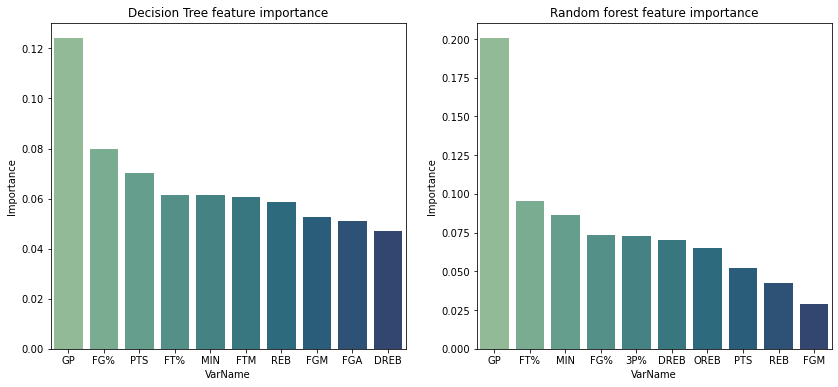

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(14,6))
clrs = ['grey' if (x < max(imp_feat_rand_forest_df)) else 'red' for x in imp_feat_rand_forest_df ]

sns.barplot(x='VarName', y="Importance",
            data=imp_feat_rand_forest_df,
            palette = 'crest', ax=axs[0]).set(title='Decision Tree feature importance')
sns.barplot(x='VarName', y="Importance",
            data=imp_feat_dtree_df, palette = 'crest', ax=axs[1]).set(title='Random forest feature importance')


Makes sense in both cases, attributes are quite the same since both methods use the same basic structure and one of them involves the other one.
In addition, since there's many values with significancy, having a look into the *correlation matrix values* might be also interesting.

In [12]:
# Building correlation matrix and display sorted values only for objective attribute
clean_NBA.corr()['TARGET_5Yrs'].sort_values(ascending = False).head(11)

TARGET_5Yrs    1.000000
GP             0.414886
MIN            0.327296
FGM            0.325031
PTS            0.323174
REB            0.308040
FTA            0.305905
FTM            0.304538
OREB           0.301263
FGA            0.297891
DREB           0.292877
Name: TARGET_5Yrs, dtype: float64

Most of the attributes exist also in MD004 analysis, and in all cases, the attribute **GP** (games played) is by large the one with greatest impact in any tested method.

Since this exercise is focused on improving techniques from Machine Learning perspective, therefore the notebook will proceeed based on this results.

The following step will be the last of this first section, just to make it visually, correlation matrix is displayed with another visualization library called **seaborn** which improves the basic display of matplotlib.

Instead using the whole dataset, the 10 attributes with the greatest importance will be used in this step, in specific the ones generated on **random forest** feature importance since values are similar and it's a good behavior for classification algorithms.

For this concrete functionality, *heatmap* is a great option because not only displays the values, also adds a color gradient to understand it faster than just read all the numbers.

In [13]:
# Selecting the importance attributes
small_size_NBA = clean_NBA[imp_feat_rand_forest_df.VarName]

# Adding the objective attribute
small_size_NBA['TARGET_5Yrs'] = clean_NBA.TARGET_5Yrs

small_size_NBA.head()

,GP,FG%,PTS,FT%,MIN,FTM,REB,FGM,FGA,DREB,TARGET_5Yrs
0,36,34.7,7.4,69.9,27.4,1.6,4.1,2.6,7.6,3.4,0.0
1,35,29.6,7.2,76.5,26.9,2.6,2.4,2.0,6.7,2.0,0.0
2,74,42.2,5.2,67.0,15.3,0.9,2.2,2.0,4.7,1.7,0.0
3,58,42.6,5.7,68.9,11.6,0.9,1.9,2.3,5.5,0.9,1.0
4,48,52.4,4.5,67.4,11.5,1.3,2.5,1.6,3.0,1.5,1.0


<AxesSubplot:>

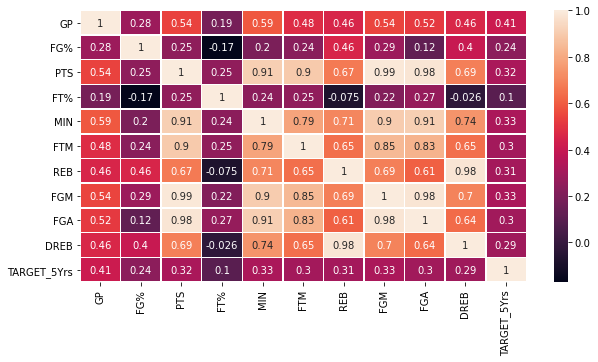

In [14]:
# Correlation matrix
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(small_size_NBA.corr(), annot=True, linewidths=.5, ax=ax)

### Heatmap observations
There's some correlations between attributes to mention, such as **PTS**, **FGM** and **FGA** display a huge correlation between them. 

In situations like this, dependin on which algorithm will be used could end up in a wrong model. For example, using **Random Forest** might not be the best algorithm if there's many attributes with this correlation between them and probably some other algorithm might fit better such as **XGBoost** since 'hides' attributes and this intercorrelation does not affect that much.

Since the first sections will be developed using **decision trees** and **random forest** would be a good practice to clean up those attributes with an intercorrelation greater than 95%. Some of them make sense:
- Points with fields goal made (FGM) and fields goal attemp (FGA). Directly related since depends exclusively on the amount of attemps.
- Minutes with those same attributes. A good player who scores a lot, needs to attempt a lot and in extension, will play a lot.
- Rebounds with defensive rebounds (DREB). This second one is a subset of the first one, makes sense it's directly related.

Dropping this many attributes (FGM, FGA, DREB) means the dataset will only maintain 7 from the initial ones which is few and could **underfit** the models.For this reason, this will be applied in 3rd section, where **random forest** is applied and could be affected.

In order to contrast, not only this dataset (10 attributes without dropping intercorrelated attributes) will be use, the initial one (without null values, of course) will also be used to build in parallel models.

This duplicity will allow to compare constantly between models with the same process but with different dataset size and data from the same source, always comparing the computational time which might be an important consideration for data scientist.


### Section 2 - Model Study 1
For this section a model based on *weak learner* is required to improve it afterwards using **bagging**.

Since *decision trees* are already considered *weark learners* from the perspective of being simple against some other algorithms such as **random forest** or boosting ones, it'll be the one to proceed with.

Firstly, a generic model will be evaluated and afterwards, a model with some improvements based on *GridSearchCV* in order to optimize the model. Remember this will be done with the initial dataset and also with the reduced one.

In [15]:
# Despite the proportion could be optimized, a 80-20 partition will be used since is a generic proportion

# Complete dataset partitions
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.2, random_state=42)

# Preparing the data 
index_small = len(small_size_NBA.columns[:small_size_NBA.shape[1]])-1
small_size_NBA_val = small_size_NBA.values

# Now it's time to slide it
y_s = small_size_NBA_val[:,index_small]
X_s = small_size_NBA_val[:,0:index_small]

# Small dataset partitions
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)
print('Complete dataset, training size:', X_train_c.shape)
print('Complete dataset, test size:', X_test_c.shape)

print('Complete dataset, training size:', X_train_s.shape)
print('Complete dataset, test size:', X_test_s.shape)

Complete dataset, training size: (1035, 19)
Complete dataset, test size: (259, 19)
Complete dataset, training size: (1035, 10)
Complete dataset, test size: (259, 10)


In [16]:
# Base models
base_tree_complete_df = DecisionTreeClassifier(random_state = 42)
base_tree_small_df = DecisionTreeClassifier(random_state = 42)


# Training models
base_tree_complete_df.fit(X_train_c, y_train_c)
base_tree_small_df.fit(X_train_s, y_train_s)


# Since this is a classification model, the best option to measure performance is the score() function.
# Furthermore, in order to visualize the confusion matrix is necessary to predict values first and build it then.


print('Complete dataset prediction (test set):', round(base_tree_complete_df.score(X_train_c, y_train_c),3))
print('Complete dataset prediction (validation set):', round(base_tree_complete_df.score(X_test_c, y_test_c),3))

print('Reduced dataset prediction (test set):', round(base_tree_small_df.score(X_train_s, y_train_s),3))
print('Reduced dataset prediction (validation set):', round(base_tree_small_df.score(X_test_s, y_test_s),3))

Complete dataset prediction (test set): 1.0
Complete dataset prediction (validation set): 0.653
Reduced dataset prediction (test set): 1.0
Reduced dataset prediction (validation set): 0.61


#### Observation
Models are overfitted in both cases (100% accuracy on training and lower accuracy in both validations). To avoid this effect, it's necessary to apply *hyperparameter tunning* on both.

*GridSearchCV*, finds out the best parameters for decision tree modelling (and for all the algorithms).

In [17]:
%%time
# Build the parameters structure for tunning the tree
params_dt = {
    'max_leaf_nodes' : [10, 25, 50, 75, 100, 150, 250, 500, 750, 1000],
    'min_samples_split' : [2, 4, 6, 8, 10],
    'min_samples_leaf' : [1, 2, 3, 4, 5],
    'max_depth' : np.arange(2, 10, 1), # From 5 to nº of attributes
    'max_features' : np.arange(1, index, 1)
}

# Build base model 
base_tree_complete_df_param0 = DecisionTreeClassifier(random_state = 42)
base_tree_small_df_param0 = DecisionTreeClassifier(random_state = 42)


# Build GridSearch object using base models and parameters activating all cores with n_jobs = -1
grid_model_base_compl = GridSearchCV(base_tree_complete_df_param0, params_dt, cv = 5, n_jobs=-1)
grid_model_base_simp = GridSearchCV(base_tree_small_df_param0, params_dt, cv = 5, n_jobs=-1)

# Fit the model applying grid parameters
base_tree_complete_df_param0 = grid_model_base_compl.fit(X_train_c, y_train_c)
base_tree_small_df_param0 = grid_model_base_simp.fit(X_train_s, y_train_s)

print("Complete dataset\nBest value: %f \nBest parameters: %s" % 
      (base_tree_complete_df_param0.best_score_, base_tree_complete_df_param0.best_params_))

print("Small dataset\nBest value: %f \nBest parameters: %s" % 
      (base_tree_small_df_param0.best_score_, base_tree_small_df_param0.best_params_))

Complete dataset
Best value: 0.691787 
Best parameters: {'max_depth': 2, 'max_features': 4, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Small dataset
Best value: 0.694686 
Best parameters: {'max_depth': 4, 'max_features': 8, 'max_leaf_nodes': 25, 'min_samples_leaf': 4, 'min_samples_split': 2}
CPU times: user 58.8 s, sys: 762 ms, total: 59.6 s
Wall time: 1min 57s


#### Observation
Looks like both models improved, arround 4% in the first one (complete dataset) and close to 9% in the second one (reduced dataset) using the same *parameter grid*. In order to ensure the model functionality it's time to build the model with *tunned parameters*, check *test/validation accuracy* and decision trees.

In [18]:
# Building models - complete dataset
# Parametrized model
base_tree_model_comp_final = DecisionTreeClassifier(
                                max_leaf_nodes = base_tree_complete_df_param0.best_params_["max_leaf_nodes"],
                                min_samples_split = base_tree_complete_df_param0.best_params_["min_samples_split"],
                                min_samples_leaf = base_tree_complete_df_param0.best_params_["min_samples_leaf"],
                                max_depth = base_tree_complete_df_param0.best_params_['max_depth'],
                                # max_features = base_tree_complete_df_param0.best_params_['max_features'],
                                random_state = 42)

# Training the model
base_tree_model_comp_final.fit(X_train_c, y_train_c)

# Visualize performance and results
print('Complete dataset prediction (test set):', round(base_tree_model_comp_final.score(X_train_c, y_train_c),3))
print('Complete dataset prediction (validation set):', round(base_tree_model_comp_final.score(
                                                                                    X_test_c, y_test_c),3))

# Building models - reduced dataset
# Parametrized model

base_tree_model_small_final = DecisionTreeClassifier(
                                max_leaf_nodes = base_tree_small_df_param0.best_params_["max_leaf_nodes"],
                                min_samples_split = base_tree_small_df_param0.best_params_["min_samples_split"],
                                min_samples_leaf = base_tree_small_df_param0.best_params_["min_samples_leaf"],
                                max_depth = base_tree_small_df_param0.best_params_['max_depth'],
                                # max_features = base_tree_small_df_param0.best_params_['max_features'],
                                random_state = 42)

# Training the model
base_tree_model_small_final.fit(X_train_s, y_train_s)

# Visualize performance and results
print('Reduced dataset prediction (test set):', round(base_tree_model_small_final.score(X_train_s, y_train_s),3))
print('Reduced dataset prediction (validation set):', round(base_tree_model_small_final.score(
                                                                                        X_test_s, y_test_s),3))

Complete dataset prediction (test set): 0.702
Complete dataset prediction (validation set): 0.676
Reduced dataset prediction (test set): 0.745
Reduced dataset prediction (validation set): 0.707


#### Observations
Building the model ignoring **max_features** parameter improves the models slightly (despite using it for find out best parameters). Results are quite surprising, using less features the model performs better on validation set (despite is giving less information to the model, might result in a better *generalization*).

In this case, the distance between *train/test* is reduced (3% and 4% respectively), asumable considering there's not that much and improves the **overfitting** problem with generic models.

Nevertheless, both model results are quite poor, meaning it might be *underfitted*.At this point there's not enough samples to fit better the problem, so the option to improve consists in apply complex algorithms trying to achieve better results.

### Section 2.2 - Bagging
Rather than using *random forest* first, which might present some kind of problems due to correlation between attributes, **bagging** will be used, but why?

**Bagging** subsamples data and builds several models and prevents from *overfitting* and reduces *variance*, giving better results than using a single algorithm. For this practice, the algorithm will be several *decision trees* taking 60% of the data for each model.

In [19]:
# Cross validation average score since CV score returns a vector and will be used frequently
def avg_cv_score(vector):
    print(vector)
    return(round(np.sum(vector)/len(vector),3))

In [20]:
# 1st - Generate basic model, defining the algorithm (decision tree) using 10 estimators by default
baggingTree_comp = BaggingClassifier(DecisionTreeClassifier(random_state = 42))
baggingTree_small = BaggingClassifier(DecisionTreeClassifier(random_state = 42))

# Learning phase
baggingTree_comp.fit(X_train_c,y_train_c)
baggingTree_small.fit(X_train_s,y_train_s)

print('Bagging accuracy, complete test set:', round(baggingTree_comp.score(X_train_c, y_train_c),3))
print('Bagging accuracy, complete validation set:', round(baggingTree_comp.score(X_test_c, y_test_c),3))
print('Bagging accuracy, small test set:', round(baggingTree_small.score(X_train_s, y_train_s),3))
print('Bagging accuracy, small validation set:', round(baggingTree_small.score(X_test_s, y_test_s),3))

Bagging accuracy, complete test set: 0.981
Bagging accuracy, complete validation set: 0.687
Bagging accuracy, small test set: 0.988
Bagging accuracy, small validation set: 0.676


#### Observations
Despite *training accuracy* is close to 100% in both models (clearly overfitting), validation has improved compared with base models getting close to **decicion trees** with tuned parameters.The following step will consist in tune hyperparameters for this bagging algorithm in order to improve predictions and see if it's possible to surpass decision tree hyperparametered results.

As first approach, try it out the same bagging but using the best parameters found for a single *decision tree*.

In [21]:
# 1st - Generate basic model, defining the algorithm (decision tree) using 10 estimators by default
baggingTree_complete_v2 = BaggingClassifier(
                            DecisionTreeClassifier(
                                max_leaf_nodes = base_tree_complete_df_param0.best_params_["max_leaf_nodes"],
                                min_samples_split = base_tree_complete_df_param0.best_params_["min_samples_split"],
                                min_samples_leaf = base_tree_complete_df_param0.best_params_["min_samples_leaf"],
                                max_depth = base_tree_complete_df_param0.best_params_['max_depth'],
                                max_features = base_tree_complete_df_param0.best_params_['max_features'],
                                random_state = 42), random_state = 42)

baggingTree_small_v2 = BaggingClassifier(
                            DecisionTreeClassifier(
                                max_leaf_nodes = base_tree_small_df_param0.best_params_["max_leaf_nodes"],
                                min_samples_split = base_tree_small_df_param0.best_params_["min_samples_split"],
                                min_samples_leaf = base_tree_small_df_param0.best_params_["min_samples_leaf"],
                                max_depth = base_tree_small_df_param0.best_params_['max_depth'],
                                max_features = base_tree_small_df_param0.best_params_['max_features'],
                                random_state = 42), random_state = 42)

# Learning phase
baggingTree_complete_v2.fit(X_train_c,y_train_c)
baggingTree_small_v2.fit(X_train_s,y_train_s)


# Scores
print('Bagging complete dataset, decision tree tuned (training dataset):',
      round(baggingTree_complete_v2.score(X_train_c,y_train_c),3))

print('Bagging complete dataset, decision tree tuned (validation dataset):',
      round(baggingTree_complete_v2.score(X_test_c,y_test_c),3))

print('Bagging small dataset, decision tree tuned (training dataset):',
      round(baggingTree_small_v2.score(X_train_s,y_train_s),3))

print('Bagging small dataset, decision tree tuned (validation dataset):',
      round(baggingTree_small_v2.score(X_test_s,y_test_s),3))

Bagging complete dataset, decision tree tuned (training dataset): 0.706
Bagging complete dataset, decision tree tuned (validation dataset): 0.672
Bagging small dataset, decision tree tuned (training dataset): 0.766
Bagging small dataset, decision tree tuned (validation dataset): 0.718


#### Observations
Results improved slightly. Small dataset validation results are slightly better than generic models and also better than **decision trees** models without tuning the *bagging hyperparameters*.

In this scenario, using the calculated hyperparameter *max_features* helps to improve results and maintain the distance between *train/test models* arround 5%, which could be the beginning of **overfitting**.

Nevertheless, it's time to hyperparametrize *bagging*. Since using the tunning parameters from decision tree gives better results (bagging is just a stack of decision trees, hence reduces variance and improves models) will be used forward, at least for bagging classifier.

In [22]:
# Parameters structure defining 
param_grid = {
    'max_samples' : [0.1, 0.2, 0.5, 0.75],
    'max_features' : np.arange(1, index, 1),
    'n_estimators':[1,5,10,20,50,100,150,200,250,300]
}

# Since bagging objects are already created there's no need to redefine them, just gridsearch ones 
grid_bag_comp = GridSearchCV(cv = 10, estimator=baggingTree_complete_v2,
                             param_grid=param_grid, scoring="accuracy", n_jobs = -1)

grid_bag_simp = GridSearchCV(cv = 10, estimator=baggingTree_small_v2,
                             param_grid=param_grid, scoring="accuracy", n_jobs = -1)

# Load data into the model
bag_obj_comp = grid_bag_comp.fit(X_train_c,y_train_c)
bag_obj_simp = grid_bag_simp.fit(X_train_s,y_train_s)

# Results
print("Complete dataset\nBest value: %f \nBest parameters: %s" % 
      (bag_obj_comp.best_score_, bag_obj_comp.best_params_))

print("Small dataset\nBest value: %f \nBest parameters: %s" % 
      (bag_obj_simp.best_score_, bag_obj_simp.best_params_))

Complete dataset
Best value: 0.715907 
Best parameters: {'max_features': 18, 'max_samples': 0.1, 'n_estimators': 50}
Small dataset
Best value: 0.719791 
Best parameters: {'max_features': 10, 'max_samples': 0.1, 'n_estimators': 300}


In [23]:
# Build the new models and evaluate them
bagg_complete_fv = BaggingClassifier( 
                    DecisionTreeClassifier(
                            # Decision Tree hyperparameters
                            max_leaf_nodes = base_tree_complete_df_param0.best_params_["max_leaf_nodes"],
                            min_samples_split = base_tree_complete_df_param0.best_params_["min_samples_split"],
                            min_samples_leaf = base_tree_complete_df_param0.best_params_["min_samples_leaf"],
                            max_depth = base_tree_complete_df_param0.best_params_['max_depth'],
                            # max_features = base_tree_complete_df_param0.best_params_['max_features'],
                            random_state = 42), 
                    # Bagging hyperparameters
                    max_samples = bag_obj_comp.best_params_['max_samples'],
                    n_estimators = bag_obj_comp.best_params_['n_estimators'],
                    # max_features = bag_obj_comp.best_params_['max_features'],
                    random_state = 42)

# Reduced dataset model
bagg_small_fv = BaggingClassifier( 
                    DecisionTreeClassifier(
                            # Decision Tree hyperparameters
                            max_leaf_nodes = base_tree_small_df_param0.best_params_["max_leaf_nodes"],
                            min_samples_split = base_tree_small_df_param0.best_params_["min_samples_split"],
                            min_samples_leaf = base_tree_small_df_param0.best_params_["min_samples_leaf"],
                            max_depth = base_tree_small_df_param0.best_params_['max_depth'],
                            # max_features = base_tree_small_df_param0.best_params_['max_features'],
                            random_state = 42), 
                    # Bagging hyperparameters
                    max_samples = bag_obj_simp.best_params_['max_samples'],
                    n_estimators = bag_obj_simp.best_params_['n_estimators'],
                    # max_features = bag_obj_simp.best_params_['max_features'],
                    random_state = 42)


# Learning phase
bagg_complete_fv.fit(X_train_c,y_train_c)
bagg_small_fv.fit(X_train_s,y_train_s)

print('Bagging complete dataset, decision tree tuned (training dataset):',
      round(bagg_complete_fv.score(X_train_c,y_train_c),3))

print('Bagging complete dataset, decision tree tuned (validation dataset):',
      round(bagg_complete_fv.score(X_test_c,y_test_c),3))

print('Bagging small dataset, decision tree tuned (training dataset):',
      round(bagg_small_fv.score(X_train_s,y_train_s),3))

print('Bagging small dataset, decision tree tuned (validation dataset):',
      round(bagg_small_fv.score(X_test_s,y_test_s),3))

Bagging complete dataset, decision tree tuned (training dataset): 0.731
Bagging complete dataset, decision tree tuned (validation dataset): 0.707
Bagging small dataset, decision tree tuned (training dataset): 0.744
Bagging small dataset, decision tree tuned (validation dataset): 0.726


#### Observations
This model as the previous ones (except bagging with tuned decision tree) is not using *max_features* and gives the best accuracy values for validation. But not only accuracy values are better, the distance between test/train results are closer than in any model arround 2%, meaning this models **avoid overfitting**.

Nevertheless, this accuracy is really low but using it, improves the result of selecting players randomly (remember, there's a 62% probabilities to select a player who's going to have a career over 5 years).

### Section 3 - Model Study 2: Random Forest application

This section will consist in develop the **random forest** configuration for improving the scores acquired by *decision trees* and *bagging*.

Since the small dataset already dropped the most **intercorrelated** attributes, and the data exploration has been handled in the first section the process will be simpler, refreshing the *correlation matrix* of both datasets and proceed in parallel with **random forest** algorithms.

<AxesSubplot:>

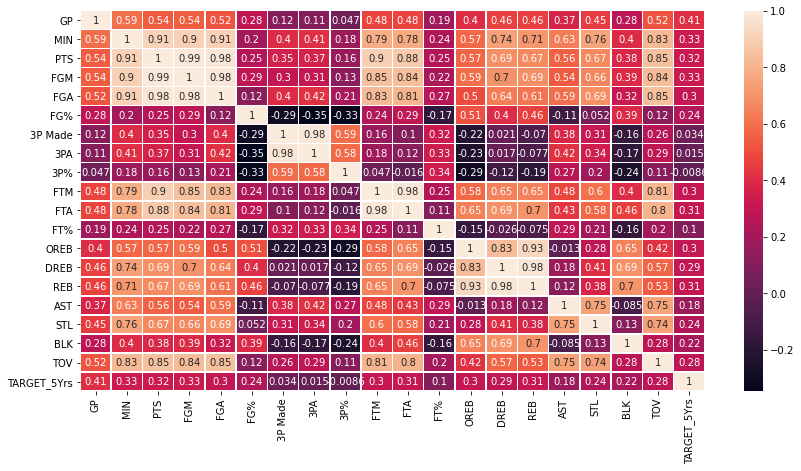

In [24]:
# Correlation matrix
f, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(clean_NBA.corr(), annot=True, linewidths=.5, ax=ax)

<AxesSubplot:>

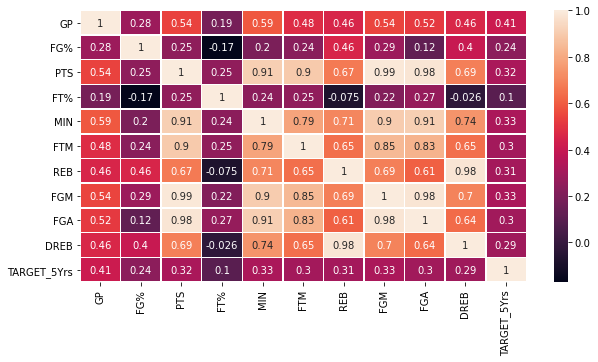

In [25]:
# Correlation matrix - seaborn heatmap
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(small_size_NBA.corr(), annot=True, linewidths=.5, ax=ax)

<AxesSubplot:>

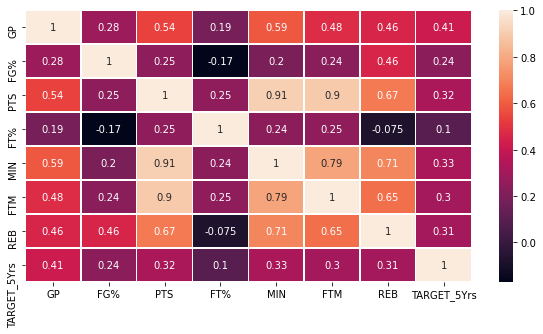

In [26]:
# Small sized without intercorrelated attributes
small_size_NBA_2 = small_size_NBA.drop(columns = ['FGM', 'FGA', 'DREB'])

# Now the final heatmap for this reduced dataset
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(small_size_NBA_2.corr(), annot=True, linewidths=.5, ax=ax)

Despite there's still attributes with strong correlation (such as *minutes played* and *field attempt* with *points*) is not that strong as the ones dropped (0.99). 

Dropping too much attributes will end up in poor models. Nevertheless, in order to test it, a final dataframe for testing purposes will be added where all values above 0.9 are dropped. This way, the majority of **intercorrelation** will be avoided.

In [27]:
# Just to test at the end
small_size_NBA_test = small_size_NBA_2.drop(columns = ['MIN', 'FTM'])

In [28]:
# Parameter's mesh for random forest
param_rf = {
    'n_estimators':[1,5,10,20,50,100,125, 150, 175, 200],
    'max_depth': [5, 10, 15, 20, 25], # Fewer since there's few attributes
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Generate the objects, for the complete dataset model and the small one (same as decision tree and bagging)
grid_rf_comp = GridSearchCV(cv = 5,
                                estimator=RandomForestClassifier(),
                                param_grid=param_rf,
                                scoring="accuracy",
                                verbose = True,
                                n_jobs = -1)

grid_rf_small = GridSearchCV(cv = 5,
                                estimator=RandomForestClassifier(),
                                param_grid=param_rf,
                                scoring="accuracy",
                                verbose = True,
                                n_jobs = -1)

# Training it 
rf_model_comp = grid_rf_comp.fit(X_train_c,y_train_c)
rf_model_small = grid_rf_small.fit(X_train_s,y_train_s)

print("Complete dataset\nBest value: %f \nBest parameters: %s" % 
      (rf_model_comp.best_score_, rf_model_comp.best_params_))

print("Small dataset\nBest value: %f \nBest parameters: %s" % 
      (rf_model_small.best_score_, rf_model_small.best_params_))

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 3002 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3884 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4485 out of 4500 | elapsed:  1.7min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:  1.0min


Complete dataset
Best value: 0.714976 
Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 125}
Small dataset
Best value: 0.718841 
Best parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 5}


[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  1.6min finished


In [29]:
# Building models based on this gridsearch

rf_complete = RandomForestClassifier(
                                    n_estimators = rf_model_comp.best_params_['n_estimators'],
                                    max_depth = rf_model_comp.best_params_['max_depth'],
                                    max_features = rf_model_comp.best_params_['max_features'],
                                    min_samples_leaf = rf_model_comp.best_params_['min_samples_leaf'],
                                    min_samples_split = rf_model_comp.best_params_['min_samples_split'],
                                    random_state = 42)

rf_small = RandomForestClassifier(
                                n_estimators = rf_model_small.best_params_['n_estimators'],
                                max_depth = rf_model_small.best_params_['max_depth'],
                                max_features = rf_model_small.best_params_['max_features'],
                                min_samples_leaf = rf_model_small.best_params_['min_samples_leaf'],
                                min_samples_split = rf_model_small.best_params_['min_samples_split'],
                                random_state = 42)

# Train models
rf_complete.fit(X_train_c,y_train_c)
rf_small.fit(X_train_s,y_train_s)

# Evaluation time
print('Random Forest complete dataset, (training dataset):',
      round(rf_complete.score(X_train_c,y_train_c),3))

print('Random Forest complete dataset, (validation dataset):',
      round(rf_complete.score(X_test_c,y_test_c),3))

print('Random Forest small dataset, (training dataset):',
      round(rf_small.score(X_train_s,y_train_s),3))

print('Random Forest small dataset, (validation dataset):',
      round(rf_small.score(X_test_s,y_test_s),3))

Random Forest complete dataset, (training dataset): 0.789
Random Forest complete dataset, (validation dataset): 0.707
Random Forest small dataset, (training dataset): 0.765
Random Forest small dataset, (validation dataset): 0.691


### Observations
Despite *random forest* is way more complex and powerful, results are slightly worse than **bagging**. A possible answer to this could be the **intercorrelation** problem mentioned earlier, related with the remaining variables. 

As a 'last shot' to this method, the following well will apply all the process to the dataset called *small_size_NBA_test* which contains even fewer attributes but less intercorrelated to be able to check another model with less **intercorrelation** but with few attributes, which can cause *underfitting* and generalize poorly.

In [30]:
# Acquire just the values
small_size_NBA_test_values = small_size_NBA_test.values

index_small_test = len(small_size_NBA_test.columns[:small_size_NBA_test.shape[1]])-1

# Now it's time to slide it
y_small_test = clean_mtx_NBA[:,index_small_test]
X_small_test = clean_mtx_NBA[:,0:index_small_test]

# Generate train/test datasets
X_train_small_test, X_test_small_test, y_train_small_test, y_test_small_test = train_test_split(X_small_test,
                                                                                                y, test_size=0.2,
                                                                                                random_state=42)

# Grid optimization
grid_rf_small_test = GridSearchCV(cv = 5,
                                estimator=RandomForestClassifier(),
                                param_grid=param_rf,
                                scoring="accuracy",
                                verbose = True,
                                n_jobs = -1)

rf_model_small_test = grid_rf_small_test.fit(X_train_small_test,y_train_small_test)


# Building model
rf_small_test = RandomForestClassifier(
                                n_estimators = rf_model_small_test.best_params_['n_estimators'],
                                max_depth = rf_model_small_test.best_params_['max_depth'],
                                max_features = rf_model_small_test.best_params_['max_features'],
                                min_samples_leaf = rf_model_small_test.best_params_['min_samples_leaf'],
                                min_samples_split = rf_model_small_test.best_params_['min_samples_split'],
                                random_state = 42)
# Training the model
rf_small_test.fit(X_train_small_test, y_train_small_test)

# Finally results
print('Random Forest small test dataset, (training dataset):',
      round(rf_small_test.score(X_train_small_test,y_train_small_test),3))

print('Random Forest complete dataset, (validation dataset):',
      round(rf_small_test.score(X_test_small_test,y_test_small_test),3))

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  1.4min finished


Random Forest small test dataset, (training dataset): 0.766
Random Forest complete dataset, (validation dataset): 0.672


#### Observations
This model is fairly bad, giving worse result than many of the ones used. The main reason for this could be the lack of information, using too few attributes.

### Section 4 - Model Study 3: Gradiend Boosted Trees

Up until now, this algorithms used were the first ones commonly used. Nowadays, some other algorithms based on the same concept (contain several trees) but configured differently for each characteristic groups.

Some of common **boosted** algorithms are:
- XGBoost: Numerical attributes (only).
- CATBoost: Performs insanely good with categorical data.
- LightGBM: Allows numerical and categorical and is the fastest one (at least within this 3).

In addition, this algorithms control quite well **overfitting**, improving substantially the performance compared with *decision trees*.

Due to NBA dataset, all the attributes being used are **numerical** (name is an exception but since it's used as a key value to identify players gives no utility). For this reason, the focus will be on **XGBoost** and **LightGBM** separatedly, looking for the best model alone. 

Afterwards, on the last section the objective consists in build several models with different configurations (not the optimized for each one) and combine them through the **stacking** method.
For this reason, this section won't be using hyperparameters (such as iterations, early stopping) and models will be tuned up with *GridSearchCV* as models up until now, but will be used at the stacking section.

#### XGBoost
Gradient descent for optimize but Randomsearch could be better in computational requirements.

Despite there's already plenty of train/test datasets, each one has been created for each step. From this section until the end of the notebook will be used the same and all the attributes since avoids the **auto correlation** between attributes.

In [31]:
# Remembering the dataset used
clean_NBA.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000
mean,60.404173,17.635162,6.803014,2.629753,5.888485,44.187172,0.249691,0.783076,19.235471,1.295440,1.816306,70.431607,1.007805,2.025193,3.032148,1.550309,0.617852,0.368779,1.191036,0.623648
std,17.415171,8.299320,4.334207,1.673617,3.576725,6.109734,0.387004,1.069495,16.121652,0.980807,1.314776,10.519306,0.774413,1.357611,2.050673,1.473860,0.410852,0.431654,0.722062,0.484657
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.900000,3.700000,1.400000,3.300000,40.225000,0.000000,0.000000,0.000000,0.600000,0.900000,64.900000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.600000,2.100000,4.800000,44.100000,0.100000,0.300000,22.200000,1.000000,1.500000,71.300000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.800000,0.400000,1.200000,32.700000,1.600000,2.300000,77.600000,1.400000,2.600000,3.900000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [32]:
# Split data into train and test for this algorithms
X_train_boost, X_test_boost, y_train_boost, y_test_boost = train_test_split(X,
                                                                            y,
                                                                            test_size=0.2, random_state=42)

In [33]:
# Now data is prepared, time to look for best parameters with GridSearchCV
# %%time
# Parameter grid for GridSearchCV
param_xgb = {
    "learning_rate": [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1],
    "max_depth": [4,5,6,7,9,10],
    # "max_leaves": [3,4,5,7,9,12,15],
    'subsample': [0.75, 0.8, 0.9, 1.0], # To prevent overfitting
    'colsample_bytree': [0.75, 0.9, 1.0],
    'eval_metric': ['logloss'],
    'n_estimators': [10, 25, 50, 100], # 100 by default 
    'objective': ['binary:logistic']
    }

# Create xgboost object
xgb_model = xgb.XGBClassifier(random_state = 42)

xgb_param = GridSearchCV(xgb_model,
                         param_xgb, n_jobs=-1,
                         cv=3)

xgb_param.fit(X_train_boost, y_train_boost)

print("Best: %f using %s" % (xgb_param.best_score_, xgb_param.best_params_))

Best: 0.709179 using {'colsample_bytree': 0.75, 'eval_metric': 'logloss', 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 50, 'objective': 'binary:logistic', 'subsample': 0.8}


In [34]:
# Build the model with this hyperparameters
xgb_opt = xgb.XGBClassifier(learning_rate = xgb_param.best_params_['learning_rate'],
                            max_depth = xgb_param.best_params_['max_depth'],
                            #max_leaves = grid.best_params_['max_leaves'],
                            subsample = xgb_param.best_params_['subsample'],
                            colsample_bytree = xgb_param.best_params_['colsample_bytree'],
                            eval_metric = xgb_param.best_params_['eval_metric'],
                            n_estimators = xgb_param.best_params_['n_estimators'],
                            objective = xgb_param.best_params_['objective'],
                            random_state = 42)

# Also building the generic one to compare results
xgb_base = xgb.XGBClassifier(random_state = 42)

# Training algorithms
xgb_opt.fit(X_train_boost, y_train_boost)
xgb_base.fit(X_train_boost, y_train_boost)

# Results!
print("Tuned model - train accuracy:",round(xgb_opt.score(X_train_boost, y_train_boost),3))
print("Tuned model - test accuracy:", round(xgb_opt.score(X_test_boost, y_test_boost),3))

print("General model - train accuracy:",round(xgb_base.score(X_train_boost, y_train_boost),3))
print("General model - test accuracy:", round(xgb_base.score(X_test_boost, y_test_boost),3))

Tuned model - train accuracy: 0.779
Tuned model - test accuracy: 0.71
General model - train accuracy: 1.0
General model - test accuracy: 0.699


### Observations
At first sight, the general model overfits without any doubt, and generalizes poorly (provides similar results in terms of test accuracy as **random forest**.

Applying some hyperparameter optimization, results are slightly improved giving the best value for all the algorithms tested with an increase of 0.3% against the 2nd best result (*bagging*, 73%).

Nevertheless, the distance between train and test accuracy is higher, meaning *bagging* model generalizes better.

In order to improve this results an option would be evaluate *learning curves* and select the best train/test partition possible.

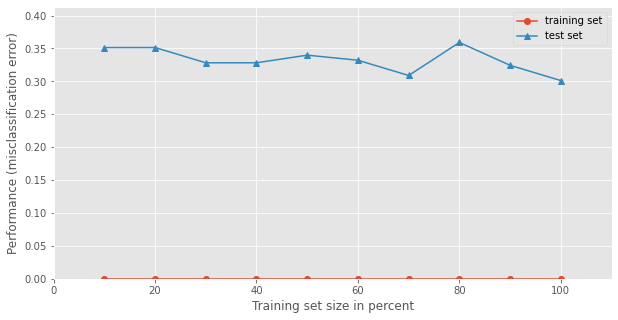

In [35]:
# General model
plt.figure(figsize=(10,5))

plot_learning_curves(X_train_boost, y_train_boost,
                     X_test_boost, y_test_boost, xgb_base, print_model=False, style='ggplot', 
                     legend_loc = 'upper right')
plt.show()

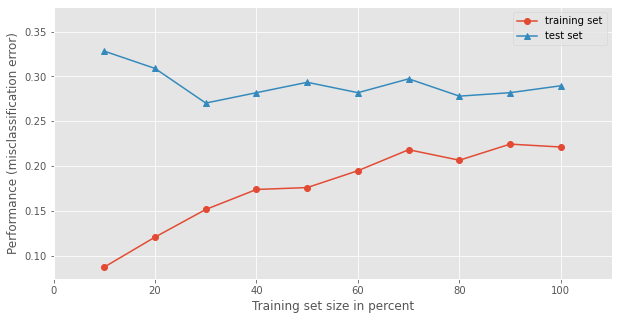

In [36]:
plt.figure(figsize=(10,5))

plot_learning_curves(X_train_boost, y_train_boost,
                     X_test_boost, y_test_boost, xgb_opt, print_model=False, style='ggplot', 
                     legend_loc = 'upper right')
plt.show()

### Observations
Generic model curves are quite ugly since it's a bad model just because there's no parametrization there.

On the second graphic, curves for the optimized model are displayed, allowing to select the best train/test partition. The best partition consists in select the smaller test error above 50% of partition. In this case, there's two values which could be a good option: **60%** and **80%**.

Since the base partition is 80/20 (basically because is fairly common use this distribution) is already 'optimized'.

#### LightGBM
Way faster algorithm, reduces a lot the computational time. The process will be generally the same: find out the best parameters and test the model a bit.

In [37]:
# Building parameter mesh for optimize
params_lgbm = {
    "learning_rate": [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1],
    "max_depth": [4,5,6,7,9,10],
    'num_leaves': [10, 25, 50, 70],
    'subsample': [0.75, 0.8, 0.9, 1.0], # To prevent overfitting
    'colsample_bytree': [0.75, 0.9, 1.0],
    'metric': ['logloss'],
    'n_estimators': [10, 25, 50, 100], # 100 by default 
    'objective': ['binary']
    }

# Build generic model
lightgb_generic = lgb.LGBMClassifier(random_state = 42)

# Objets and optimization
lightgbm_opt = lgb.LGBMClassifier(random_state = 42)

lightgbm_grid = GridSearchCV(lightgbm_opt,
                    params_lgbm, n_jobs=-1, cv=5)

# Training time
lightgb_generic.fit(X_train_boost, y_train_boost)

lightgbm_grid.fit(X_train_boost, y_train_boost)

# Best parameters for optimized algorithm
print("Best: %f using %s" % (lightgbm_grid.best_score_, lightgbm_grid.best_params_))

Best: 0.712077 using {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'metric': 'logloss', 'n_estimators': 25, 'num_leaves': 10, 'objective': 'binary', 'subsample': 0.75}


In [38]:
# Results
print("General model - train accuracy:", round(lightgb_generic.score(X_train_boost, y_train_boost),3))
print("General model - test accuracy:", round(lightgb_generic.score(X_test_boost, y_test_boost),3))

# Model with best parameters
lightgbm_opt = lgb.LGBMClassifier(learning_rate = lightgbm_grid.best_params_['learning_rate'],
                               max_depth = lightgbm_grid.best_params_['max_depth'],
                               num_leaves = lightgbm_grid.best_params_['num_leaves'],
                               subsample = lightgbm_grid.best_params_['subsample'],
                               colsample_bytree = lightgbm_grid.best_params_['colsample_bytree'],
                               n_estimators = lightgbm_grid.best_params_['n_estimators'],
                               objective = lightgbm_grid.best_params_['objective'],
                               metric = 'log_loss')

# Train the model
lightgbm_opt.fit(X_train_boost, y_train_boost)

# Generate predictions and score
print("\nTuned model - train accuracy:",round(lightgbm_opt.score(X_train_boost, y_train_boost),3))

print("Tuned model - test accuracy:", round(lightgbm_opt.score(X_test_boost, y_test_boost),3))

General model - train accuracy: 1.0
General model - test accuracy: 0.722

Tuned model - train accuracy: 0.799
Tuned model - test accuracy: 0.714


### Results
This last models did not improve previous results since some of the initial models perform slightly well, meaning in this case, for this data, might be a good option to simplify the model complexity and focus on simpler ones.

Nevertheless, the model has a difference between train and test accuracy big enough to consider it might be *slightly overfitted*.

To improve testability an option would be try to fit the data into distribution functions in order to extract and build a *data generator* because the low results can rely on:
- the data quality is not sufficient meaning there's noise and the attributes do not have enough information.
- the size of your data set is small, more data is required to fit properly models.

With the *data generator* second point could be solved. Nevertheless, this could not be the only solution for this classification problem, **stacking** could solve this by building models focused in specific characteristics of the dataset if it's faced as a classification problem.

Another option could be use some of this algorithms in **regression** mode since the objective is determine wheter a player will have a successful carreer (over 5 years) or not, so a **logistics regression** could be a good option.

In [39]:
# Simple accuracy calculation for binary matrices since regression score is about probability not classes
def confusion_matrix_accuracy_binary(matrix):
    num = matrix[0,0] + matrix[1,1]
    den = matrix.sum()
    return round((num/den),3)

xgb_reg_opt = xgb.XGBRegressor() 

xgb_reg_opt = xgb.XGBRegressor(learning_rate = xgb_param.best_params_['learning_rate'],
                            max_depth = xgb_param.best_params_['max_depth'],
                            #max_leaves = grid.best_params_['max_leaves'],
                            subsample = xgb_param.best_params_['subsample'],
                            colsample_bytree = xgb_param.best_params_['colsample_bytree'],
                            eval_metric = xgb_param.best_params_['eval_metric'],
                            n_estimators = xgb_param.best_params_['n_estimators'],
                            objective = xgb_param.best_params_['objective'],
                            random_state = 42)

# Train the model
xgb_reg_opt.fit(X_train_boost, y_train_boost)

# Predict values
xgb_reg_opt_pred = xgb_reg_opt.predict(X_train_boost)
pred_bool_1 = [1 if x>=0.5 else 0 for x in xgb_reg_opt_pred] # Compact loop with condition

xgb_reg_opt_pred2 = xgb_reg_opt.predict(X_test_boost)
pred_bool_2 = [1 if x>=0.5 else 0 for x in xgb_reg_opt_pred2] # Compact loop with condition

# Generate confusion matrices
conf_m1 = confusion_matrix(y_train_boost,pred_bool_1)
conf_m2 = confusion_matrix(y_test_boost, pred_bool_2)

print('XGBoost regressor accuracy on training set:',confusion_matrix_accuracy_binary(conf_m1))
print('XGBoost regressor accuracy on test set:',confusion_matrix_accuracy_binary(conf_m2))


XGBoost regressor accuracy on training set: 0.779
XGBoost regressor accuracy on test set: 0.71


#### Observations
Despite testing many algorithms it is not possible to optimize results. A possible solution for that could be balance the dataset through some **data augmentation** technique such as build a data generator for each class and add to the dataset the amount of measures to balance it.

Another solution in that same way would be drop randomly measures from the class with more measures in order to balance the dataset. Nevertheless this solution could not be as good as it looks since if the drop is not let's say *stratified* would end up in alterate the variance and crash any possible model.

### Section 5 - Model Selection
In order to decide which model is better to compare it visually since there's a lot of models used.

In [40]:
models = ['Decision Tree', 'Decision Tree',
         'Decision Tree', 'Decision Tree',
         'Bagging DT', 'Bagging DT',
         'Bagging DT tuned', 'Bagging DT tuned',
         'Bagging DT tuned', 'Bagging DT tuned',
         'Random Forest', 'Random Forest', 'Random Forest',
         'XGBoost Classifier', 'XGBoost Classifier',
         'LightGBM Classifier', 'LightGBM Classifier',
         'XGBoost Regressor']

tuned = ['N', 'N',
        'Y', 'Y',
        'N', 'N',
        'N', 'N',
        'Y', 'Y',
        'Y', 'Y', 'Y',
        'Y', 'Y',
        'Y', 'Y',
        'Y']

dataset = ['Complete', 'Small',
          'Complete', 'Small',
          'Complete', 'Small',
          'Complete', 'Small',
          'Complete', 'Small',
        'Complete', 'Small', 'Extra Small',
        'Complete', 'Complete',
          'Complete', 'Complete',
          'Complete']

train_accuracy = [round(base_tree_complete_df.score(X_train_c, y_train_c),3),
                  round(base_tree_small_df.score(X_train_s, y_train_s),3),
                    round(base_tree_model_comp_final.score(X_train_c, y_train_c),3),
                  round(base_tree_model_small_final.score(X_train_s, y_train_s),3),
                  round(baggingTree_comp.score(X_train_c, y_train_c),3),
                  round(baggingTree_small.score(X_train_s, y_train_s),3),
                  round(baggingTree_complete_v2.score(X_train_c,y_train_c),3),
                  round(baggingTree_small_v2.score(X_train_s,y_train_s),3),
                  round(bagg_complete_fv.score(X_train_c,y_train_c),3),
                  round(bagg_small_fv.score(X_train_s,y_train_s),3),
                  round(rf_complete.score(X_train_c,y_train_c),3),
                  round(rf_small.score(X_train_s,y_train_s),3),
                  round(rf_small_test.score(X_train_small_test,y_train_small_test),3),
                  round(xgb_opt.score(X_train_boost, y_train_boost),3),
                  round(xgb_base.score(X_train_boost, y_train_boost),3),
                  round(lightgb_generic.score(X_train_boost, y_train_boost),3),
                  round(lightgbm_opt.score(X_train_boost, y_train_boost),3),
                  confusion_matrix_accuracy_binary(conf_m1)
                 ]

validation_accuracy = [round(base_tree_complete_df.score(X_test_c, y_test_c),3),
                       round(base_tree_small_df.score(X_test_s, y_test_s),3),
                      round(base_tree_model_comp_final.score(X_test_c, y_test_c),3),
                      round(base_tree_model_small_final.score(X_test_s, y_test_s),3),
                      round(baggingTree_comp.score(X_test_c, y_test_c),3),
                      round(baggingTree_small.score(X_test_s, y_test_s),3),
                      round(baggingTree_complete_v2.score(X_test_c,y_test_c),3),
                      round(baggingTree_small_v2.score(X_test_s,y_test_s),3),
                      round(bagg_complete_fv.score(X_test_c,y_test_c),3),
                      round(bagg_small_fv.score(X_test_s,y_test_s),3),
                       round(rf_complete.score(X_test_c,y_test_c),3),
                       round(rf_small.score(X_test_s,y_test_s),3),
                       round(rf_small_test.score(X_test_small_test,y_test_small_test),3),
                       round(xgb_opt.score(X_test_boost, y_test_boost),3),
                       round(xgb_base.score(X_test_boost, y_test_boost),3),
                       round(lightgb_generic.score(X_test_boost, y_test_boost),3),
                       round(lightgbm_opt.score(X_test_boost, y_test_boost),3),
                       confusion_matrix_accuracy_binary(conf_m2)
                      ]

final_results = {'Model': models, 'Tuned':tuned, 'Dataset': dataset,
                 'Train accuracy': train_accuracy,
                 'Validation accuracy': validation_accuracy}

pd.DataFrame(final_results)

,Model,Tuned,Dataset,Train accuracy,Validation accuracy
0,Decision Tree,N,Complete,1.000,0.653
1,Decision Tree,N,Small,1.000,0.610
2,Decision Tree,Y,Complete,0.702,0.676
3,Decision Tree,Y,Small,0.745,0.707
4,Bagging DT,N,Complete,0.981,0.687
5,Bagging DT,N,Small,0.988,0.676
6,Bagging DT tuned,N,Complete,0.706,0.672
7,Bagging DT tuned,N,Small,0.766,0.718
8,Bagging DT tuned,Y,Complete,0.731,0.707
9,Bagging DT tuned,Y,Small,0.744,0.726


In [41]:
# Worst models (accuracy score)
pd.DataFrame(final_results).sort_values(by = 'Validation accuracy', ascending=False).head()

,Model,Tuned,Dataset,Train accuracy,Validation accuracy
9,Bagging DT tuned,Y,Small,0.744,0.726
15,LightGBM Classifier,Y,Complete,1.000,0.722
7,Bagging DT tuned,N,Small,0.766,0.718
16,LightGBM Classifier,Y,Complete,0.799,0.714
13,XGBoost Classifier,Y,Complete,0.779,0.710


In [42]:
# Consideration metric: distance between validation and train accuracy
result_df = pd.DataFrame(final_results)
result_df['Accuracy distance'] = abs(result_df['Validation accuracy'] - result_df['Train accuracy'])

# Final visualization
result_df.sort_values(by = ['Accuracy distance','Validation accuracy'], ascending = True).head(8)

,Model,Tuned,Dataset,Train accuracy,Validation accuracy,Accuracy distance
9,Bagging DT tuned,Y,Small,0.744,0.726,0.018
8,Bagging DT tuned,Y,Complete,0.731,0.707,0.024
2,Decision Tree,Y,Complete,0.702,0.676,0.026
6,Bagging DT tuned,N,Complete,0.706,0.672,0.034
3,Decision Tree,Y,Small,0.745,0.707,0.038
7,Bagging DT tuned,N,Small,0.766,0.718,0.048
13,XGBoost Classifier,Y,Complete,0.779,0.710,0.069
17,XGBoost Regressor,Y,Complete,0.779,0.710,0.069


#### Results
With this 'new metric' is simple to find out the best model built. Instead just selecting by *validation accuracy* which could be the intuitive option since the results looked for are the best model with validation data, exists the possibility of using an **overfitted** model if the selection only considers the accuracy.

For this reason, an extra column has been added to the dataframe, called *accuracy distance*. This measure calculates the distance between validation and train. With great distances, the model is overfitting clearly, and with small ones, the model performs great accordingly the data.

In this case, the best model is **Bagging** using hyperparameters in the internal *decision trees* and also tuned the *bagging* itself. Accuracy is not good (meaning the model won't be able to predict quite securely, but values between train/test are quite the same, avoiding overfitting. Might not be the best model (in terms of accuracy since reaches only 72.6%) but it's incredibly robust and there's practically no overfitting.

### Section 6 - Model Explanation
For this section, **xgboost** will be used, building a model and use **Shaples** to visualize some information. This will help in order to ensure attribute selection and understand what is going on with the data and the model.

In [43]:
# Building the data 
d_train_xgb = xgb.DMatrix(X_train_boost, label = y_train_boost)
d_test_xgb = xgb.DMatrix(X_test_boost, label=y_test_boost)

In [44]:
# Generic model
params = {
    "learning_rate": 0.002,
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "max_depth": 4,
    "max_leaves": 5
}

model_xgb33 = xgb.train(params
                        , d_train_xgb
                        , 40000
                        , evals = [(d_test_xgb, "Test")]
                        , verbose_eval=1000
                        , early_stopping_rounds=1000)

[0]	Test-logloss:0.69267
Will train until Test-logloss hasn't improved in 1000 rounds.
[1000]	Test-logloss:0.56439
[2000]	Test-logloss:0.55921
Stopping. Best iteration:
[1915]	Test-logloss:0.55902



In [45]:
# Tuned up model with previous parameters
xgb_params = {
    "learning_rate": xgb_param.best_params_['learning_rate'],
    "max_depth": xgb_param.best_params_['max_depth'],
    'subsample': xgb_param.best_params_['subsample'],
    'colsample_bytree': xgb_param.best_params_['colsample_bytree'],
    'eval_metric': xgb_param.best_params_['eval_metric'],
    'n_estimators': xgb_param.best_params_['n_estimators'],
    'objective': xgb_param.best_params_['objective']}

model_xgb = xgb.train(xgb_params
                        , d_train_xgb
                        , 40000
                        , evals = [(d_test_xgb, "Test")]
                        , verbose_eval=1000
                        , early_stopping_rounds=1000)

[16:53:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-logloss:0.69293
Will train until Test-logloss hasn't improved in 1000 rounds.
[1000]	Test-logloss:0.58382
[2000]	Test-logloss:0.55816
[3000]	Test-logloss:0.55235
[4000]	Test-logloss:0.55103
[5000]	Test-logloss:0.55167
Stopping. Best iteration:
[4067]	Test-logloss:0.55092



In [46]:
# Results are the same!

In [47]:
# Github trick to allow xgboost be used by shap since there was an error in the decoder
model_bytearray = model_xgb.save_raw()[4:]
def myfun(self=None):
    return model_bytearray

model_xgb.save_raw = myfun

In [48]:
# Shap library
import shap

# print the JS visualization code to the notebook 
shap.initjs()


X = clean_NBA.drop(columns=['TARGET_5Yrs'], axis = 1)
y = clean_NBA['TARGET_5Yrs']

explainer_xgb = shap.TreeExplainer(model_xgb)
shap_values_xgb = explainer_xgb.shap_values(X)

In [49]:
# Simple visualization of different instances to understand how are affected
print('Instance 0 - shap')
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[0,:], X.iloc[0,:])

Instance 0 - shap


In [50]:
print('Instance 65 - shap')
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[65,:], X.iloc[0,:])

Instance 65 - shap


In [51]:
# Visualize the importance between attributes and player's careers
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[:1000,:], X.iloc[:1000,:])

#### Shap visualizations
Using shap values is quite simple visually to understand what is going on in the model. Just to remark interesting visualizations on the graphic:
- GP: Significant difference, playing few games means it'll probably (mostly sure) the player won't reach the 5 years career except for few ones which are brillint in some aspect of the game. Mostly of the players who play above 67 games will surpass and would be good signs for the company. That means it's necessary to play a lot of games, and players won't reach the 5 years mark just for playing games, they need to do something else.
- FG%: The effect is similar, but with this attribute exists an extra *bandage*. Under 40%, players will unlikely surpass the objective, between 40 - 60% is quite secure (except some critical points) but over 61% it's halfway: having over 61% accuracy on field points gives less 'security' of surpassing the objective. (unexpected!)
- MIN: This migth be one of the top2 attributes to be used for selecting players. The difference is fairly clear, under 15 minutes (per game) players most likely won't pass the 5 years border, between 15 and 20 minutes the proportion of surpassing/no is way clear, but over this 20 is critical: players who play many minutes are quite sure to be professional players long time.
- PTS: Also an important factor, players who overall score 6 points or more have great chances, quite unbalanced because it's the majority of the records, so won't be determinant.

Overall, most of the attributes have this boundary located more or less under the median values, what does it mean? It means there's many types of players who surpass the 5 years, mainly because there's different roles on the field, so not everyone will be selected for the same reason, every aspect of the game is necessary, and those players who are excellent in any aspect might be selected. Also those ones with great averages despite do not have any metric in the top are also good candidates.

XBoost


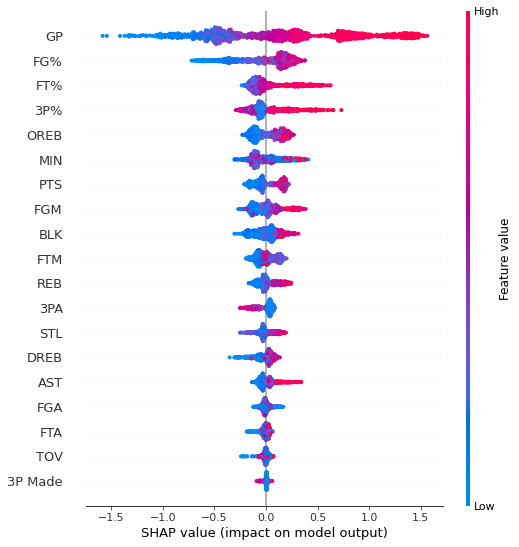

In [52]:
# Visualize importance for the model
shap_dict = {'model': ['XBoost']
             , 'explainer': [explainer_xgb]
             , 'values': [shap_values_xgb]}

for i in range(0,len(shap_dict['model'])):
    print(shap_dict['model'][i])
    shap.summary_plot(shap_dict['values'][i], X)

#### Observations
Many attributes gives few information. The ones with a wide range (GP for example) have a wide effect range and might depend on other factors to ensure player selection.

On the other hand, attributes such as FT% or 3P% have positive impact, since the 'negative' (blue) is located arround the 0 and the 'positive' (red) is extended to the positive grid.

XGB


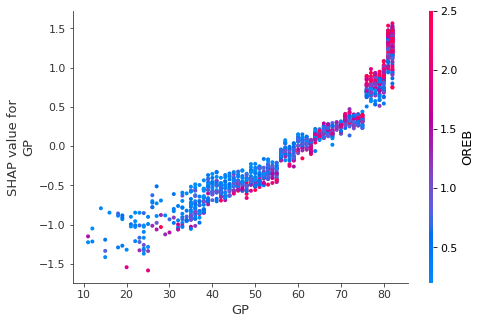

XGB


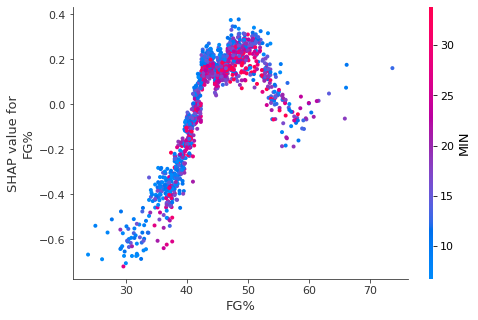

XGB


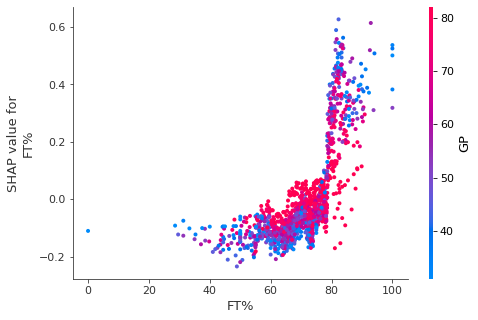

XGB


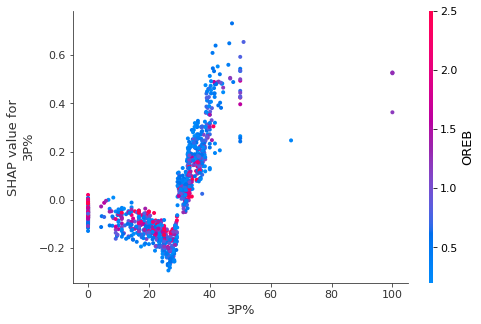

In [53]:
top_inds_xgb = np.argsort(-np.sum(np.abs(shap_values_xgb), 0))
# make SHAP plots of the three most important features to visualize the relation
for i in range(0,4):
    print("XGB")
    shap.dependence_plot(top_inds_xgb[i], shap_values_xgb, X, display_features = X)

### Extra section - Model Stacking
Apply stacking method with different basic models in order to improve results achieved. 

Since it's a classification method, makes sense to test few configurations.

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 



# Building general models for stacking
base_tree_stack = DecisionTreeClassifier(random_state = 42)
baggingTree_stack = BaggingClassifier(DecisionTreeClassifier(random_state = 42), random_state = 42)
rf_stack = RandomForestClassifier(random_state = 42)
xgb_stack = xgb.XGBClassifier(random_state = 42)
lightgbm_stack = lgb.LGBMClassifier(random_state = 42)
log_stack = LogisticRegression(random_state = 42)
knn_stack = KNeighborsClassifier(n_neighbors=1)
bayes_stack = GaussianNB()



# Classifier's list for Stacked
classifiers_stacked = [log_stack, baggingTree_stack]

# Build general stacking with some tunning hyperparameter
gbt = GradientBoostingClassifier(subsample= 0.6, learning_rate = 0.05, n_estimators= 3000)
sclf = StackingClassifier(classifiers=classifiers_stacked, meta_classifier=gbt)

# Generate lists for usage in the display

classifiers = [base_tree_stack, baggingTree_stack, rf_stack, xgb_stack, lightgbm_stack,log_stack,
               knn_stack, sclf]
classifiers_labels = ['XGBoost', 'LightGBM']
classifiers_labels = ['Decision Tree', 'Bagging - Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM',
                      'LogisticRegression','KNN', 'Stacked']


for classifier, name in zip(classifiers, classifiers_labels):
    # train the classifier
    classifier.fit(X, y)
    # Cross validation for each one
    scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), name))

Accuracy: 0.60 (+/- 0.04) [Decision Tree]
Accuracy: 0.65 (+/- 0.04) [Bagging - Decision Tree]
Accuracy: 0.69 (+/- 0.02) [Random Forest]
Accuracy: 0.68 (+/- 0.02) [XGBoost]
Accuracy: 0.68 (+/- 0.02) [LightGBM]
Accuracy: 0.71 (+/- 0.02) [LogisticRegression]
Accuracy: 0.61 (+/- 0.02) [KNN]
Accuracy: 0.65 (+/- 0.04) [Stacked]


In [55]:
# Try to generate records based on mean + std deviation (rand etc) or reduce the big dataset until classes are 
# balanced, then, apply the best models + stacking method and see what happens. we're assuming the sample is 
# representative of the group

# Split the datasets
zero_df = small_size_NBA[small_size_NBA['TARGET_5Yrs'] == 0]
one_df = small_size_NBA[small_size_NBA['TARGET_5Yrs'] == 1]

print('Target zero:', zero_df.shape)
print('Target one:', one_df.shape)

print('Relation between classes:',round(zero_df.shape[0]/one_df.shape[0],3))

Target zero: (487, 11)
Target one: (807, 11)
Relation between classes: 0.603


In [56]:
# The unbalance is noticeable! try to find out a distribution which describes the dataset and proceed 
# rather than just duplicate values (FOR ALL THE ATTRIBUTES note the best model has been done with small dataset,
# therefore the procedure will be on that attributes. ++ Use randomsearch for bagging tree classifier
zero_df.describe()

,GP,FG%,PTS,FT%,MIN,FTM,REB,FGM,FGA,DREB,TARGET_5Yrs
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.0
mean,51.106776,42.281109,5.000616,69.048255,14.139836,0.911088,2.219302,1.929774,4.517454,1.513552,0.0
std,16.787859,6.626454,3.081235,11.356544,6.530837,0.664781,1.459479,1.191239,2.579837,1.009635,0.0
min,11.000000,23.800000,0.700000,0.000000,3.100000,0.000000,0.300000,0.300000,0.800000,0.200000,0.0
25%,39.000000,38.000000,3.050000,63.350000,9.400000,0.500000,1.200000,1.200000,2.800000,0.800000,0.0
50%,51.000000,41.700000,4.100000,70.000000,12.700000,0.700000,1.800000,1.600000,3.900000,1.200000,0.0
75%,64.000000,46.000000,6.100000,76.500000,17.450000,1.100000,2.900000,2.350000,5.350000,2.000000,0.0
max,82.000000,65.900000,21.900000,100.000000,37.200000,5.000000,11.000000,8.000000,17.600000,7.700000,0.0


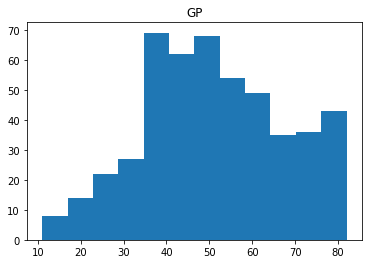

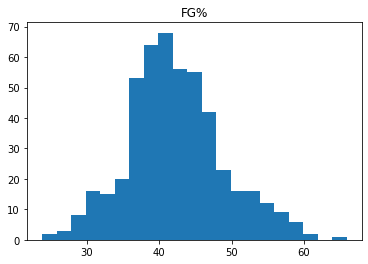

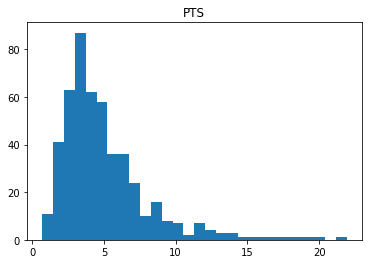

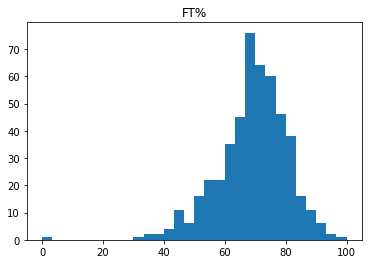

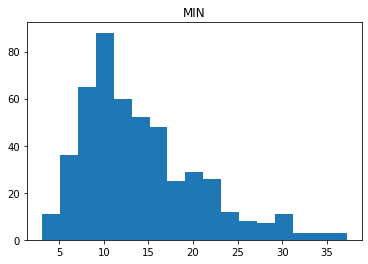

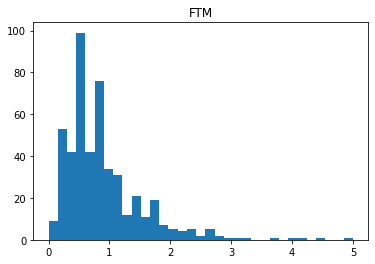

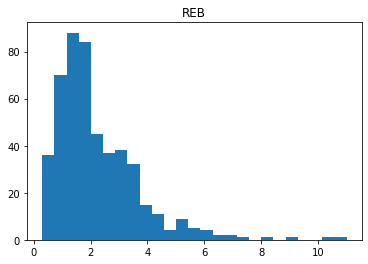

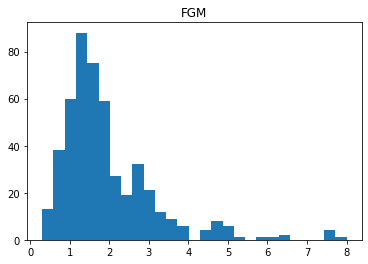

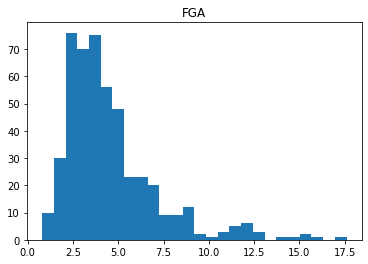

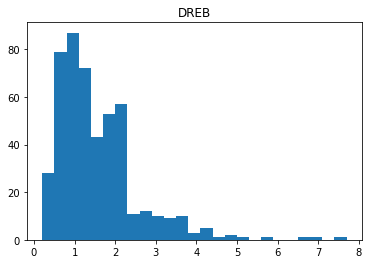

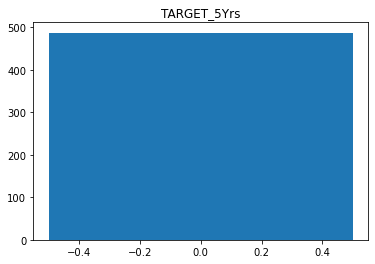

In [57]:
# Histograms
for attribute in zero_df.keys():
    plt.hist(zero_df[attribute], bins='auto')
    plt.title(attribute)
    plt.show()

The attributes mostly look like a chi2 y normal distribution summarized 
- **GP**: Despite should be a mixed one, use Norm due to simplicity
- **FG%**: Norm
- **PTS**: Chi2
- **FT%**: Norm
- **MIN**: Chi2
- **FTM**: Chi2
- **REB**: Chi2
- **FGM**: Chi2
- **FGA**: Chi2
- **DREB**: Chi2

Now it's time to build the distributions. Once those are ready, try to predict as many values for each attribute
to achieve the balance between classes.

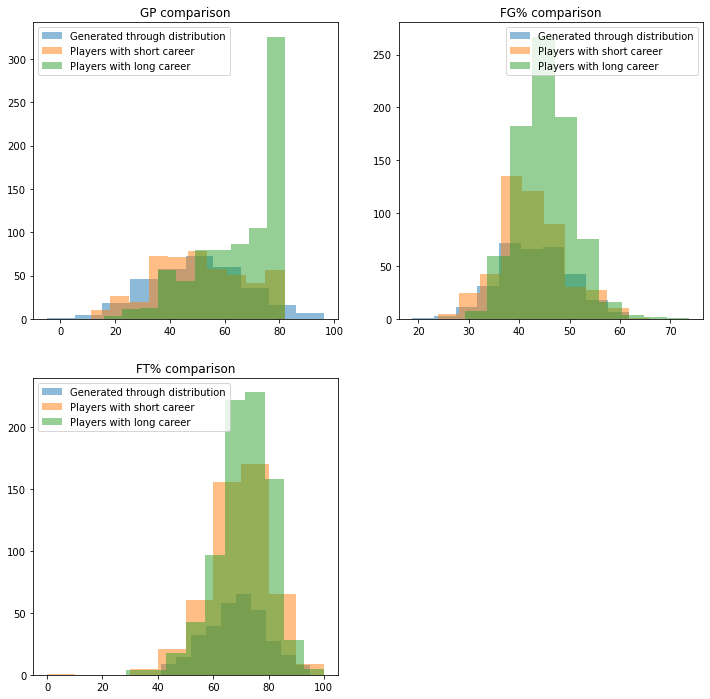

In [58]:
# Values for distributions - normal ones
mean_gp, var_gp  = scipy.stats.distributions.norm.fit(zero_df['GP'])
mean_fg_perc, var_fg_perc  = scipy.stats.distributions.norm.fit(zero_df['FG%'])
mean_ft_perc, var_ft_perc  = scipy.stats.distributions.norm.fit(zero_df['FT%'])

# Predict values randomly within the model built
gp_gen = np.random.normal(mean_gp, var_gp, size=one_df.shape[0]-zero_df.shape[0])
fg_perc_gen = np.random.normal(mean_fg_perc, var_fg_perc, size=one_df.shape[0]-zero_df.shape[0])
ft_perc_gen = np.random.normal(mean_ft_perc, var_ft_perc, size=one_df.shape[0]-zero_df.shape[0])

# Comparison between predicted and real, Normal distributions
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('GP comparison')
plt.hist(gp_gen, alpha = 0.5, label = 'Generated through distribution')
plt.hist(zero_df['GP'], alpha = 0.5, label = 'Players with short career')
plt.hist(one_df['GP'], alpha = 0.5, label = 'Players with long career')
plt.legend()

plt.subplot(2,2,2)
plt.title('FG% comparison')
plt.hist(fg_perc_gen, alpha = 0.5, label = 'Generated through distribution')
plt.hist(zero_df['FG%'], alpha = 0.5, label = 'Players with short career')
plt.hist(one_df['FG%'], alpha = 0.5, label = 'Players with long career')
plt.legend()

plt.subplot(2,2,3)
plt.title('FT% comparison')
plt.hist(ft_perc_gen, alpha = 0.5, label = 'Generated through distribution')
plt.hist(zero_df['FT%'], alpha = 0.5, label = 'Players with short career')
plt.hist(one_df['FT%'], alpha = 0.5, label = 'Players with long career')
plt.legend()

This is a visual example on how some distributions might differ between two classes. on GP and FP% it's very clear, group 0 (non surpassing players) and group 1 (surpassing players) have a different distribution, while on FT% looks way more similar.

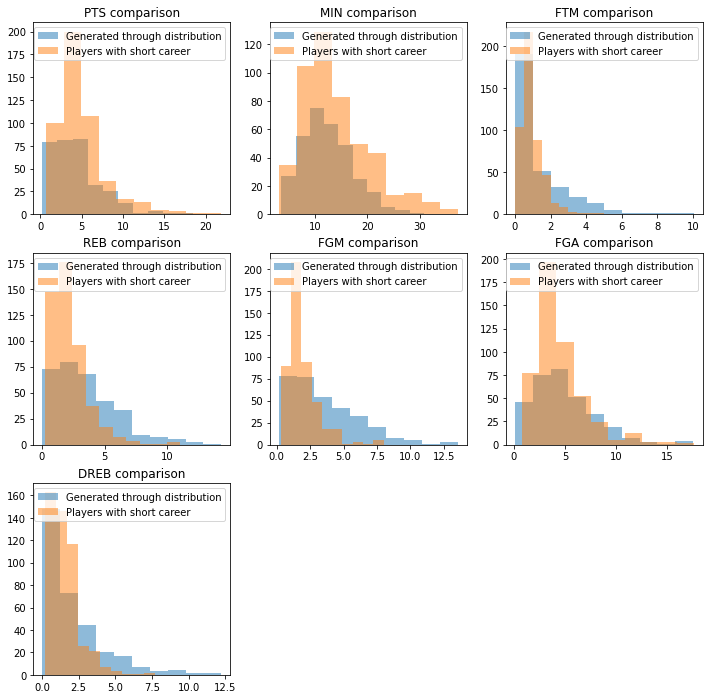

In [59]:
# Now it's time for Chi2 distributions
pts_gen = np.random.chisquare(4.5,size = one_df.shape[0]-zero_df.shape[0])
min_gen = np.random.chisquare(13,size = one_df.shape[0]-zero_df.shape[0])
ftm_gen = np.random.chisquare(1.5,size = one_df.shape[0]-zero_df.shape[0])
reb_gen = np.random.chisquare(3.5,size = one_df.shape[0]-zero_df.shape[0])
fgm_gen = np.random.chisquare(3.5,size = one_df.shape[0]-zero_df.shape[0])
fga_gen = np.random.chisquare(5,size = one_df.shape[0]-zero_df.shape[0])
dreb_gen = np.random.chisquare(2,size = one_df.shape[0]-zero_df.shape[0])

plt.figure(figsize=(12,12))

plt.subplot(3,3,1)
plt.title('PTS comparison')
plt.hist(pts_gen ,alpha = 0.5,
         label = 'Generated through distribution')
plt.hist(zero_df['PTS'],alpha = 0.5, label = 'Players with short career')
# plt.hist(one_df['PTS'],alpha = 0.5, label = 'Players with long career')
plt.legend()

plt.subplot(3,3,2)
plt.title('MIN comparison')
plt.hist(min_gen ,alpha = 0.5,
         label = 'Generated through distribution')
plt.hist(zero_df['MIN'],alpha = 0.5, label = 'Players with short career')
# plt.hist(one_df['MIN'],alpha = 0.5, label = 'Players with long career')
plt.legend()

plt.subplot(3,3,3)
plt.title('FTM comparison')
plt.hist(ftm_gen ,alpha = 0.5,
         label = 'Generated through distribution')
plt.hist(zero_df['FTM'],alpha = 0.5, label = 'Players with short career')
# plt.hist(one_df['MIN'],alpha = 0.5, label = 'Players with long career')
plt.legend()

plt.subplot(3,3,4)
plt.title('REB comparison')
plt.hist(reb_gen ,alpha = 0.5,
         label = 'Generated through distribution')
plt.hist(zero_df['REB'],alpha = 0.5, label = 'Players with short career')
# plt.hist(one_df['MIN'],alpha = 0.5, label = 'Players with long career')
plt.legend()

plt.subplot(3,3,5)
plt.title('FGM comparison')
plt.hist(fgm_gen ,alpha = 0.5,
         label = 'Generated through distribution')
plt.hist(zero_df['FGM'],alpha = 0.5, label = 'Players with short career')
# plt.hist(one_df['MIN'],alpha = 0.5, label = 'Players with long career')
plt.legend()

plt.subplot(3,3,6)
plt.title('FGA comparison')
plt.hist(fga_gen ,alpha = 0.5,
         label = 'Generated through distribution')
plt.hist(zero_df['FGA'],alpha = 0.5, label = 'Players with short career')
# plt.hist(one_df['MIN'],alpha = 0.5, label = 'Players with long career')
plt.legend()

plt.subplot(3,3,7)
plt.title('DREB comparison')
plt.hist(dreb_gen ,alpha = 0.5,
         label = 'Generated through distribution')
plt.hist(zero_df['DREB'],alpha = 0.5, label = 'Players with short career')
# plt.hist(one_df['MIN'],alpha = 0.5, label = 'Players with long career')
plt.legend()

#### Observations
Despite this generated values are similar to the distribution and fairly distant to the other group (those players with target_5yrs = 1) will assume it's fine. Although, there's some things to take into consideration:
- To apply this methods, there's a basic assumption: samples are representative enough to describe the whole domain, which is uncertain.
- This 'distributions' to apply **data augmentation** have been tuned manually, would be necessary to tune it up with some optimization method to get the best possible value to reproduce as much as possible the reality.
- Notice the distributions are different size, since the **zero's dataset** contains 487 samples and the generetion implies 320, that's why there's a huge difference between histograms. Nevertheless, in this display the objective is to check distribution form for the generation.

Last steps:
- Build a final dataframe where both classes will be balanced.
- Apply the best method and stacking to check if the model has improved or not.

In [60]:
test = {small_size_NBA.keys()[0]: gp_gen, # GP
       small_size_NBA.keys()[1]: fg_perc_gen, # FG%
       small_size_NBA.keys()[2]: pts_gen, #PTS
       small_size_NBA.keys()[3]: ft_perc_gen, #FT%
       small_size_NBA.keys()[4]: min_gen, # MIN
       small_size_NBA.keys()[5]: ftm_gen, # FTM
       small_size_NBA.keys()[6]: reb_gen, # REB
       small_size_NBA.keys()[7]: fgm_gen, # FGM
       small_size_NBA.keys()[8]: fga_gen, # FGA,
       small_size_NBA.keys()[9]: dreb_gen }# DREB

gen_data = pd.DataFrame(test)

# Adding the target attribute
gen_data[small_size_NBA.keys()[10]] = 0

gen_data.head()

,GP,FG%,PTS,FT%,MIN,FTM,REB,FGM,FGA,DREB,TARGET_5Yrs
0,61.463497,36.727311,5.588148,56.076972,16.480638,1.736844,4.888226,2.084922,9.627862,0.433647,0
1,38.366064,39.058292,0.870126,51.740180,12.875448,0.049335,1.239399,2.901673,6.899704,2.132782,0
2,46.235770,42.501074,1.075047,57.755426,4.969108,0.128179,2.274986,4.981103,5.685373,0.252136,0
3,54.303141,40.533700,3.772657,75.534381,5.841240,0.348206,2.855120,3.623924,0.790068,0.131805,0
4,63.710664,38.199196,3.754140,76.087908,13.165149,0.782874,1.448009,1.092109,4.446636,0.717936,0


In [61]:
# Time to concatenate this partial dataset with the original one
merged_df = small_size_NBA.append(gen_data, ignore_index=True)

In [62]:
merged_df.describe() - small_size_NBA.describe()

,GP,FG%,PTS,FT%,MIN,FTM,REB,FGM,FGA,DREB,TARGET_5Yrs
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,-2.027891,-0.199551,-0.490105,-0.374032,-1.012156,0.012442,0.099468,0.184787,-0.188776,0.018216,-0.123648
std,0.462414,0.217701,-0.120032,0.076637,-0.307357,0.157367,0.099631,0.247990,-0.078557,0.194619,0.015498
min,-15.844376,-4.992805,-0.460661,0.000000,0.000000,0.000000,-0.250544,-0.152067,-0.695567,-0.185201,0.000000
25%,-2.000000,-0.325000,-0.341262,-0.600000,-0.500000,0.000000,0.000000,0.000000,-0.100000,-0.100000,0.000000
50%,-3.749558,-0.200000,-0.400000,-0.450000,-1.100000,0.000000,0.100000,0.100000,0.000000,0.000000,-0.500000
75%,-2.000000,0.088948,-0.600000,-0.314785,-1.600000,0.100000,0.200000,0.200000,-0.148630,0.100000,0.000000
max,14.247042,0.000000,0.000000,0.000000,0.000000,2.352222,0.387684,3.326014,0.000000,2.616621,0.000000


#### Observation
Differentes are not that much considering there's an addition of 320 units, overall is quite similar, only in max values there's a noticeable difference, due to avoid processing the data with thresholds.

In [63]:
# Splitting the data 
index_merged = len(merged_df.columns[:merged_df.shape[1]])-1
merged_df_val = merged_df.values

# Now it's time to slide it
y_m = merged_df_val[:,index_merged]
X_m = merged_df_val[:,0:index_merged]

# Small dataset partitions
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.2, random_state=42)

In [64]:
baggingTree_merged = BaggingClassifier(
                                DecisionTreeClassifier(random_state = 42), random_state = 42)

# Learning phase
baggingTree_merged.fit(X_train_m,y_train_m)


# Scores
print('Bagging complete dataset, decision tree tuned (training dataset):',
      round(baggingTree_merged.score(X_train_m,y_train_m),3))

print('Bagging complete dataset, decision tree tuned (validation dataset):',
      round(baggingTree_merged.score(X_test_m,y_test_m),3))


Bagging complete dataset, decision tree tuned (training dataset): 0.986
Bagging complete dataset, decision tree tuned (validation dataset): 0.743


test values are quite good compared with previous algorithms and datasets, where the best algorithm (tuned). Now, improve results by using **RandomizedGridSearchCV** because it'll take few resources and time to compute.

In [65]:
from sklearn.model_selection import RandomizedSearchCV

params_dt_2 = {
    'max_leaf_nodes' : [10,1000],
    'min_samples_split' : [2,30],
    'min_samples_leaf' : [2,30],
    'max_depth' : [2, 20], # From 5 to nº of attributes
    'max_features' : [2, 20]
}
# define base model
base_model_dt = DecisionTreeClassifier(random_state = 42)

best_params_dt_merg = RandomizedSearchCV(base_model_dt, params_dt_2, n_jobs=-1, cv=10, random_state = 42)

best_params_dt_merg.fit(X_train_m, y_train_m)

print("Decision Tree\nBest value: %f \nBest parameters: %s" % 
      (best_params_dt_merg.best_score_, best_params_dt_merg.best_params_))


Decision Tree
Best value: 0.687048 
Best parameters: {'min_samples_split': 30, 'min_samples_leaf': 2, 'max_leaf_nodes': 10, 'max_features': 2, 'max_depth': 20}


In [66]:
# Bagging tunning
params_bagg_m = {
    'max_samples' : [0.1, 1],
    'max_features' : [2, 35],
    'n_estimators':[1,500]
}

bagging_m = BaggingClassifier(
                            DecisionTreeClassifier(
                                    max_leaf_nodes = best_params_dt_merg.best_params_["max_leaf_nodes"],
                                    min_samples_split = best_params_dt_merg.best_params_["min_samples_split"],
                                    min_samples_leaf = best_params_dt_merg.best_params_["min_samples_leaf"],
                                    max_depth = best_params_dt_merg.best_params_['max_depth'],
                                    max_features = best_params_dt_merg.best_params_['max_features'],
                                    random_state = 42), random_state = 42)

grid_bag_simp = RandomizedSearchCV(bagging_m, params_bagg_m, cv = 10, n_jobs = -1, random_state = 42)

# Load data into the model
bagging_best_params_m = grid_bag_simp.fit(X_train_m,y_train_m)

# Results
print("Complete dataset\nBest value: %f \nBest parameters: %s" % 
      (bagging_best_params_m.best_score_, bagging_best_params_m.best_params_))

Complete dataset
Best value: 0.728885 
Best parameters: {'n_estimators': 500, 'max_samples': 0.1, 'max_features': 2}


In [67]:
# Full throttle, final model!
bagg_merged_fv = BaggingClassifier( 
                    DecisionTreeClassifier(
                                    max_leaf_nodes = best_params_dt_merg.best_params_["max_leaf_nodes"],
                                    min_samples_split = best_params_dt_merg.best_params_["min_samples_split"],
                                    min_samples_leaf = best_params_dt_merg.best_params_["min_samples_leaf"],
                                    max_depth = best_params_dt_merg.best_params_['max_depth'],
                                    max_features = best_params_dt_merg.best_params_['max_features'],
                                    random_state = 42), 
                    # Bagging hyperparameters
                    max_samples = bagging_best_params_m.best_params_['max_samples'],
                    n_estimators = bagging_best_params_m.best_params_['n_estimators'],
                    max_features = bagging_best_params_m.best_params_['max_features'],
                    random_state = 42)


# Learning phase
bagg_merged_fv.fit(X_train_m,y_train_m)

print('Bagging complete dataset, decision tree tuned (training dataset):',
      round(bagg_merged_fv.score(X_train_m,y_train_m),3))

print('Bagging complete dataset, decision tree tuned (test dataset):',
      round(bagg_merged_fv.score(X_test_m,y_test_m),3))

Bagging complete dataset, decision tree tuned (training dataset): 0.747
Bagging complete dataset, decision tree tuned (test dataset): 0.765


In [68]:
result_df.sort_values(by = ['Accuracy distance','Validation accuracy'], ascending = True).head(1)

,Model,Tuned,Dataset,Train accuracy,Validation accuracy,Accuracy distance
9,Bagging DT tuned,Y,Small,0.744,0.726,0.018


### Results
Finally observed the improvement of the model after some processing onto the training data, adding data to balance the classes distribution from the objective attribute.

Despite accuracy is slightly better, (small distance between training/test dataset and improved arround 4%) is a bad algorithm depending on the application. For detecting diseases is a disaster but in terms of selecting players for represent means 3 of each 4 would have long careers, meaning the 'net' income would be 2 players.

That means for each 4 players selected the company would ensure the income for 2 of them which is basically ensure the income money for the company which is quite good.

Despite this 'tricky procedure' to help the model improve, there's few records for that many attributes, making some of them useless and some others irrelevant due to the **correlation** with some other attributes. This means there's something out of the bag being missed for the company (maybe number of interviews, followers, or whatever) which might be fairly important for having a long career and find it out would become the key to build better models.

Also a final comment to take into consideration: the **data augmentation** has been tuned manually and roughly, without selecting the perfect distributions or building specific ones for the attributes. If the distributions used were the perfect ones and were tuned up with proper algorithm optimization, the accuracy would've been way better, probably reaching out the 80% on the model.